In [225]:
import cv2
import numpy as np

from skimage.feature import hog
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt


In [226]:
def load_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# capture face from webcam or image
known_faces =  ["./faces/john_wick_sample1.jpg", "./faces/iroman_sample1.jpg"]
known_faces = [load_image(img_path) for img_path in known_faces]

In [227]:
# extract HOG features
def extract_hog_features(image):
    hog_img = hog(image)
    return hog_img

In [228]:
# reshape to 2d array, it is required for use "cosine_similarity" function
hog_features = [extract_hog_features(img) for img in known_faces]
hog_features = [np.array(feat).reshape(1, -1) for feat in hog_features]

In [229]:
# calculate the similarity
def check_similarity(img_path):
    input_img = load_image(img_path)
    img_hog = extract_hog_features(input_img)
    img_hog = np.array(img_hog).reshape(1, -1)

    fig, axes = plt.subplots(len(hog_features), 2)
    for idx, (face_hog, axe) in enumerate(zip(hog_features, axes)):
        similarity = cosine_similarity(img_hog, face_hog)
        axe[0].imshow(cv2.cvtColor(input_img, cv2.COLOR_GRAY2RGB))
        axe[1].imshow(cv2.cvtColor(known_faces[idx], cv2.COLOR_GRAY2RGB))
        
        axe[0].set_title(f"similarity score: {similarity[0][0]}")
        axe[0].axis("off")
        axe[1].axis("off")
        
        
    plt.show()

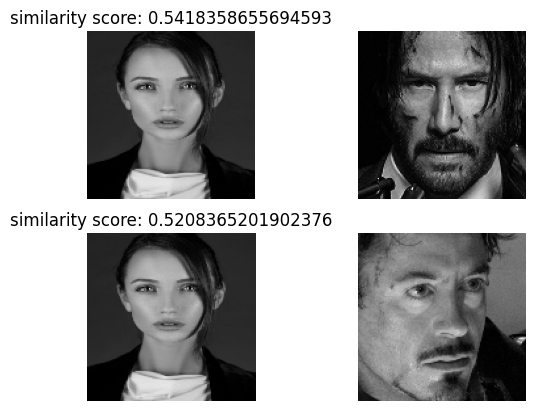

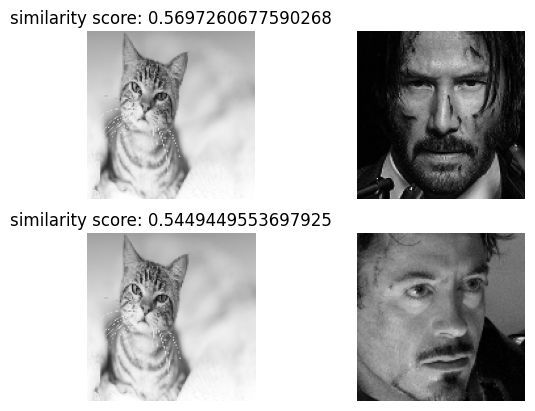

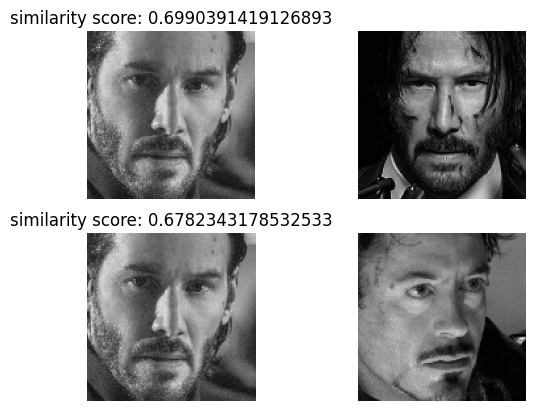

In [236]:
check_similarity("./test/face_sample1.jpg")
check_similarity("./test/cat_sample1.jpg")
check_similarity("./test/john_wick_sample2.jpg")


We can tune the parameters of HOG function to get better scores.